sex     0    1  Total
cp                   
0      28   73    101
1      15   25     40
2      21   33     54
3       4   13     17
Total  68  144    212

restecg    0    1  Total
cp                      
0         55   46    101
1         16   24     40
2         25   29     54
3         10    7     17
Total    106  106    212
fbs      0   1  Total
cp                   
0       91  10    101
1       35   5     40
2       44  10     54
3       14   3     17
Total  184  28    212
Predicted   0  Total
Actual              
0          42     42
1          10     10
2          33     33
3           6      6
Total      91     91


/Users/cfitzpatrick/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tools/tools.py:158: FutureWarning: categorical is deprecated. Use pandas Categorical to represent categorical data and can get_dummies to construct dummy arrays. It will be removed after release 0.13.
  warnings.warn(
/Users/cfitzpatrick/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tools/tools.py:158: FutureWarning: categorical is deprecated. Use pandas Categorical to represent categorical data and can get_dummies to construct dummy arrays. It will be removed after release 0.13.
  warnings.warn(


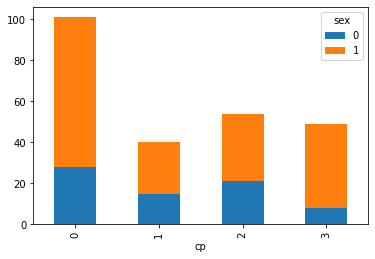

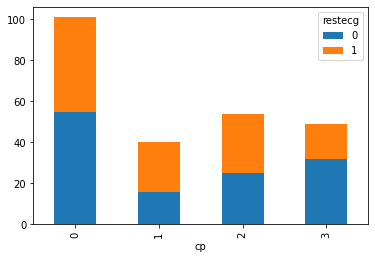

In [196]:
import pandas as pd
from sklearn.model_selection import train_test_split
import random 
import numpy as np
import scipy.stats.distributions as dist
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
import statsmodels.tools.tools as stattools


#Read in data set
heart = pd.read_csv("/Users/cfitzpatrick/Downloads/archive (3)/heart1.csv")



#Split
heart_train, heart_test = train_test_split(heart, test_size = 0.30, random_state = 50)
heart_test.shape

#Validate the partition

heart_train.value_counts()
heart_train['cp'].value_counts()
to_resample = heart_train.loc[heart_train['cp'] == 3]

#Resample with 32 to reach 20%
our_resample = to_resample.sample(n = 32, replace = True) 

heart_train_rebal = pd.concat([heart_train, our_resample])

heart_train_rebal['cp'].value_counts()

#New balanced values 
heart_train_rebal.cp.value_counts().tolist() 

#Naive Bayes

t1= pd.crosstab(heart_train['cp'], heart_train['sex'])
t1['Total'] = t1.sum(axis=1)
t1.loc['Total'] = t1.sum()
print(t1)

print()

t2= pd.crosstab(heart_train['cp'], heart_train['restecg'])
t2['Total'] = t2.sum(axis=1)
t2.loc['Total'] = t2.sum()
print(t2)

t3= pd.crosstab(heart_train['cp'], heart_train['fbs'])
t3['Total'] = t3.sum(axis=1)
t3.loc['Total'] = t3.sum()
print(t3)


t1_plot = pd.crosstab(heart_train_rebal['cp'], heart_train_rebal['sex'])
t1_plot.plot(kind='bar', stacked = True)

t2_plot = pd.crosstab(heart_train_rebal['cp'], heart_train_rebal['restecg'])
t2_plot.plot(kind='bar', stacked = True)

X_cp_ind = np.array(heart_train_rebal['cp'])
(X_cp_ind , X_cp_ind_dict) = stattools.categorical(X_cp_ind, 
            drop=True, dictnames=True)
X_cp_ind = pd.DataFrame(X_cp_ind)

X_sex_ind = np.array(heart_train_rebal['sex'])
(X_sex_ind , X_sex_ind_dict) = stattools.categorical(X_sex_ind, 
            drop=True, dictnames=True)
X_sex_ind = pd.DataFrame(X_sex_ind)

X_restecg_ind = np.array(heart_train_rebal['restecg'])
(X_restecg_ind , X_restecg_ind_dict) = stattools.categorical(X_restecg_ind, 
            drop=True, dictnames=True)
X_restecg_ind = pd.DataFrame(X_restecg_ind)

X = pd.concat ((X_sex_ind, X_restecg_ind), axis = 1)


Y = heart_train_rebal['cp']

nb_01 = MultinomialNB().fit(X, Y)

X_cp_ind_test = np.array(heart_test['cp'])
(X_cp_ind_test , X_cp_ind_dict_test) = stattools.categorical(X_cp_ind_test, 
            drop=True, dictnames=True)
X_cp_ind_test = pd.DataFrame(X_cp_ind_test)

X_sex_ind_test = np.array(heart_test['sex'])
(X_sex_ind_test , X_sex_ind_dict_test) = stattools.categorical(X_sex_ind_test, 
            drop=True, dictnames=True)
X_sex_ind_test = pd.DataFrame(X_sex_ind_test)


X_restecg_ind = np.array(heart_test['restecg'])
(X_restecg_ind_test , X_restecg_ind_dict) = stattools.categorical(X_restecg_ind, 
            drop=True, dictnames=True)

X_restecg_ind_test = pd.DataFrame(X_restecg_ind_test)




X_test = pd.concat((X_sex_ind_test, X_restecg_ind_test), axis = 1)

Y_predicted = nb_01.predict(X_test)



ypred = pd.crosstab(heart_test['cp'], Y_predicted,
                   rownames = ['Actual'],
                   colnames = ['Predicted']);ypred
ypred['Total'] = ypred.sum(axis=1); ypred.loc['Total'] = ypred.sum(); ypred


print(ypred)






In [173]:
X.head()

,0,1,0,1
0,0.0,1.0,0.0,1.0
1,0.0,1.0,0.0,1.0
2,1.0,0.0,1.0,0.0
3,0.0,1.0,0.0,1.0
4,0.0,1.0,0.0,1.0


In [172]:
X_test.head()

,0,1,0,1
0,1.0,0.0,0.0,1.0
1,0.0,1.0,0.0,1.0
2,0.0,1.0,1.0,0.0
3,1.0,0.0,1.0,0.0
4,0.0,1.0,0.0,1.0


In [181]:
Y_predicted = nb_01.predict(X_test)

print(Y_predicted)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [171]:
X_test = pd.concat((X_sex_ind_test, X_restecg_ind_test), axis = 1)

Y_predicted = nb_01.predict(X_test)

ypred = pd.crosstab(heart_test['cp'], Y_predicted,
                   rownames = ['Actual'],
                   colnames = ['Predicted'])

print(Y_predicted)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [180]:

print(ypred)

Predicted   0
Actual       
0          42
1          10
2          33
3           6


In [199]:
print(X)

       0    1    0    1
0    0.0  1.0  1.0  0.0
1    0.0  1.0  1.0  0.0
2    1.0  0.0  0.0  1.0
3    0.0  1.0  1.0  0.0
4    0.0  1.0  0.0  1.0
..   ...  ...  ...  ...
239  0.0  1.0  0.0  1.0
240  1.0  0.0  0.0  1.0
241  1.0  0.0  0.0  1.0
242  0.0  1.0  1.0  0.0
243  0.0  1.0  1.0  0.0

[244 rows x 4 columns]


In [195]:
print(Y_predicted)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [198]:
print(X_test)

      0    1    0    1
0   1.0  0.0  0.0  1.0
1   0.0  1.0  0.0  1.0
2   0.0  1.0  1.0  0.0
3   1.0  0.0  1.0  0.0
4   0.0  1.0  0.0  1.0
..  ...  ...  ...  ...
86  1.0  0.0  0.0  1.0
87  0.0  1.0  1.0  0.0
88  0.0  1.0  0.0  1.0
89  1.0  0.0  0.0  1.0
90  0.0  1.0  0.0  1.0

[91 rows x 4 columns]
